# Graph Visualization

This notebook demonstrates techniques for visualizing different types of graphs in the causal meta-learning library.

In [2]:
# Import necessary modules
import sys
import os

# Add the root directory to the path to make imports work
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_dir not in sys.path:
    sys.path.append(root_dir)

# Import common libraries
import numpy as np
import matplotlib.pyplot as plt

# Import the causal meta-learning library
from causal_meta.graph import Graph, DirectedGraph, CausalGraph
import causal_meta.graph.visualization as viz

# Graph Visualization

This notebook demonstrates the graph visualization capabilities of the causal meta-learning library. We'll cover:

1. Basic graph visualization
2. Customizing node and edge appearance
3. Different layout algorithms
4. Highlighting paths and nodes
5. Visualizing causal graph features

Let's get started!

In [3]:
# Import necessary modules
import sys
import os

# Add the root directory to the path to make imports work
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_dir not in sys.path:
    sys.path.append(root_dir)

# Import the graph classes and visualization module
from causal_meta.graph import Graph, DirectedGraph, CausalGraph
import causal_meta.graph.visualization as viz

import numpy as np
import matplotlib.pyplot as plt

## 1. Basic Graph Visualization

Let's start by creating and visualizing a simple directed graph.

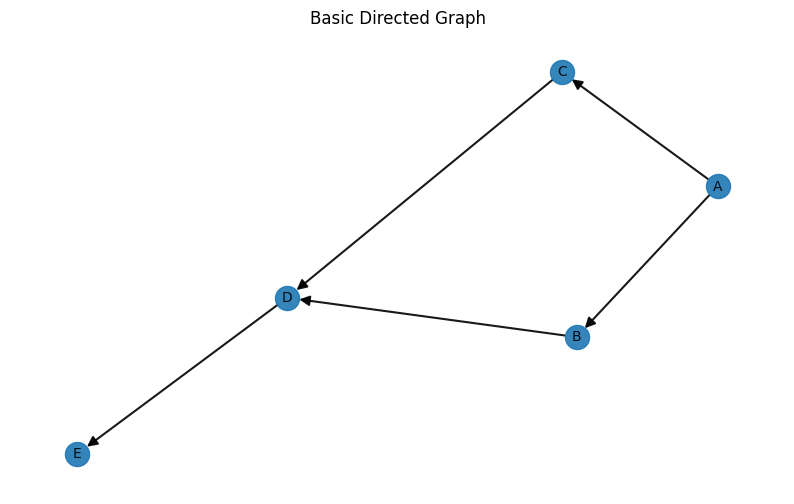

In [4]:
# Create a simple directed graph
digraph = DirectedGraph()
for node in ['A', 'B', 'C', 'D', 'E']:
    digraph.add_node(node)

digraph.add_edge('A', 'B')
digraph.add_edge('A', 'C')
digraph.add_edge('B', 'D')
digraph.add_edge('C', 'D')
digraph.add_edge('D', 'E')

# Basic visualization
plt.figure(figsize=(10, 6))
ax = plt.gca()
viz.plot_graph(digraph, ax=ax, title="Basic Directed Graph")
plt.show()

## 2. Customizing Node and Edge Appearance

Now let's customize the appearance of nodes and edges in our visualization.

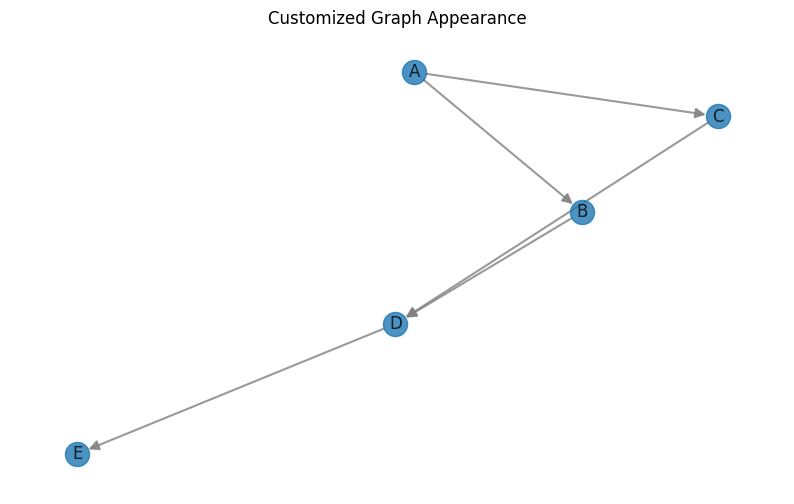

In [6]:
# Customizing node attributes
custom_graph = DirectedGraph()

# Add nodes with attributes
custom_graph.add_node('A', color='red', size=800)
custom_graph.add_node('B', color='blue', size=600)
custom_graph.add_node('C', color='green', size=600)
custom_graph.add_node('D', color='purple', size=600)
custom_graph.add_node('E', color='orange', size=800)

# Add edges with attributes
custom_graph.add_edge('A', 'B', weight=2, style='dashed')
custom_graph.add_edge('A', 'C', weight=1, style='solid')
custom_graph.add_edge('B', 'D', weight=3, style='dotted')
custom_graph.add_edge('C', 'D', weight=2, style='solid')
custom_graph.add_edge('D', 'E', weight=4, style='solid')

# Visualization with custom node colors and sizes
plt.figure(figsize=(10, 6))
ax = plt.gca()

viz.plot_graph(custom_graph, ax=ax, title="Customized Graph Appearance",
              with_labels=True,              # Show node labels
              font_size=12,                  # Set label font size
              edge_color='gray',             # Default edge color
              alpha=0.8)                # Node transparency
plt.show()

## 3. Different Layout Algorithms

The library supports various layout algorithms for positioning nodes in the visualization.

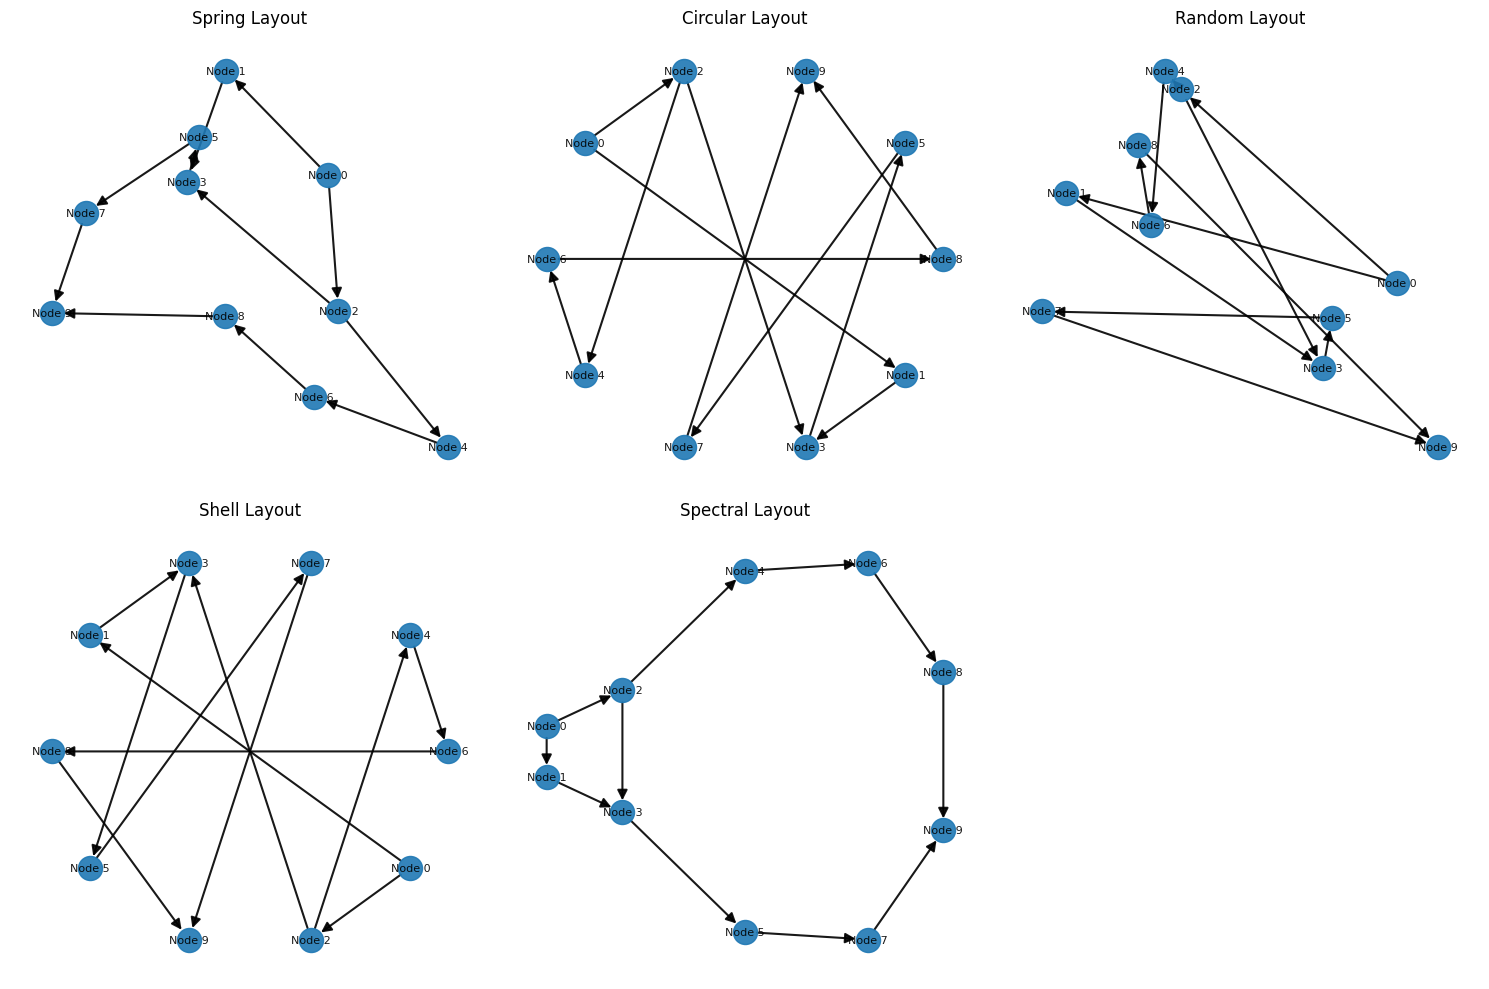

In [7]:
# Create a larger graph to demonstrate layouts
layout_graph = DirectedGraph()
for i in range(10):
    layout_graph.add_node(f"Node {i}")

# Add some edges
layout_graph.add_edge("Node 0", "Node 1")
layout_graph.add_edge("Node 0", "Node 2")
layout_graph.add_edge("Node 1", "Node 3")
layout_graph.add_edge("Node 2", "Node 3")
layout_graph.add_edge("Node 2", "Node 4")
layout_graph.add_edge("Node 3", "Node 5")
layout_graph.add_edge("Node 4", "Node 6")
layout_graph.add_edge("Node 5", "Node 7")
layout_graph.add_edge("Node 6", "Node 8")
layout_graph.add_edge("Node 7", "Node 9")
layout_graph.add_edge("Node 8", "Node 9")

# Different layout algorithms
layouts = ['spring', 'circular', 'random', 'shell', 'spectral']

# Create a grid of plots with different layouts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, layout in enumerate(layouts):
    ax = axes[i]
    viz.plot_graph(layout_graph, ax=ax, title=f"{layout.capitalize()} Layout",
                  layout=layout,
                  with_labels=True,
                  font_size=8,
                  node_size=300)

# Remove any unused subplots
for j in range(len(layouts), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4. Highlighting Paths and Nodes

The visualization module supports highlighting specific paths, nodes, and edges in the graph.

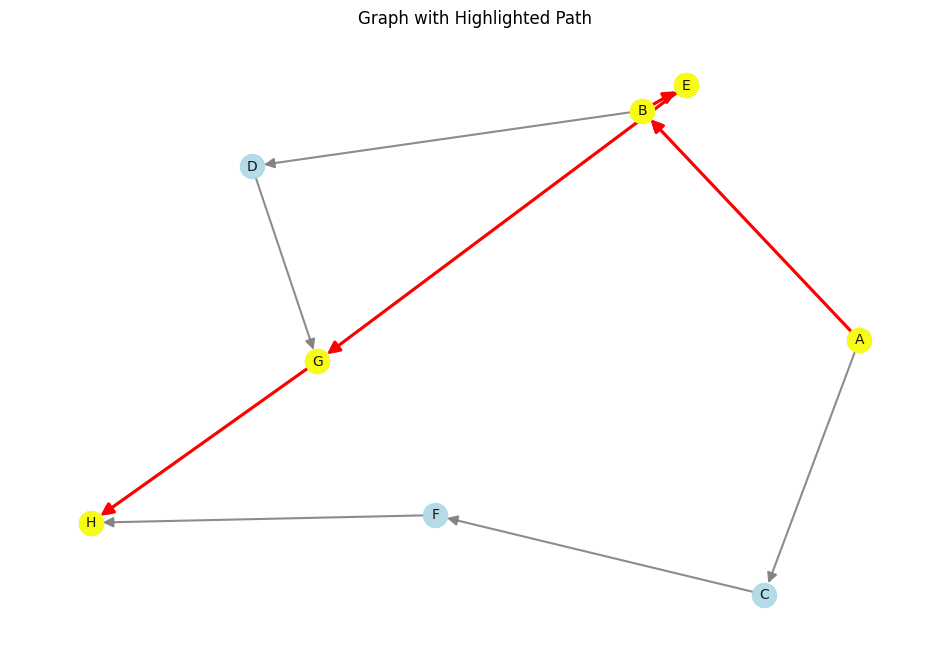

In [9]:
# Create a medium-sized directed graph
highlight_graph = DirectedGraph()
for node in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    highlight_graph.add_node(node)

highlight_graph.add_edge('A', 'B')
highlight_graph.add_edge('A', 'C')
highlight_graph.add_edge('B', 'D')
highlight_graph.add_edge('B', 'E')
highlight_graph.add_edge('C', 'F')
highlight_graph.add_edge('D', 'G')
highlight_graph.add_edge('E', 'G')
highlight_graph.add_edge('F', 'H')
highlight_graph.add_edge('G', 'H')

# Define a path to highlight
path = ['A', 'B', 'E', 'G', 'H']
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]

# Visualization with highlighted path
plt.figure(figsize=(12, 8))
ax = plt.gca()
viz.plot_graph(highlight_graph, ax=ax, title="Graph with Highlighted Path",
              highlight_nodes=path,                   # Nodes to highlight
              highlight_edges=path_edges,             # Edges to highlight
              highlight_node_color='yellow',          # Color for highlighted nodes
              highlight_edge_color='red',             # Color for highlighted                
              node_color='lightblue',                 # Default node color
              edge_color='gray',                      # Default edge color
              with_labels=True)                       # Show node labels
plt.show()

## 5. Visualizing Causal Graph Features

The `plot_causal_graph` function provides specialized visualizations for causal graphs, including highlighting d-separation, backdoor paths, and interventions.

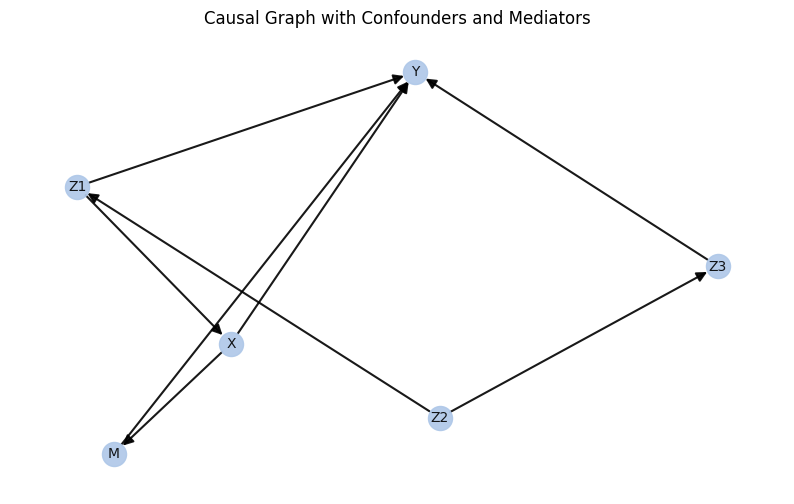

In [10]:
# Create a causal graph
causal_graph = CausalGraph()
for node in ['X', 'Y', 'Z1', 'Z2', 'Z3', 'M']:
    causal_graph.add_node(node)

# Add edges
causal_graph.add_edge('X', 'M')   # Treatment -> Mediator
causal_graph.add_edge('M', 'Y')   # Mediator -> Outcome
causal_graph.add_edge('X', 'Y')   # Treatment -> Outcome (direct effect)
causal_graph.add_edge('Z1', 'X')  # Confounder -> Treatment
causal_graph.add_edge('Z1', 'Y')  # Confounder -> Outcome
causal_graph.add_edge('Z2', 'Z1') # Upstream variable -> Confounder
causal_graph.add_edge('Z2', 'Z3') # Common cause
causal_graph.add_edge('Z3', 'Y')  # Another path to outcome

# Basic causal graph visualization
plt.figure(figsize=(10, 6))
ax = plt.gca()
viz.plot_causal_graph(causal_graph, ax=ax, title="Causal Graph with Confounders and Mediators")
plt.show()

### Highlighting backdoor paths

Backdoor paths from X to Y:
  Path 1: ['X', 'Z1', 'Y']


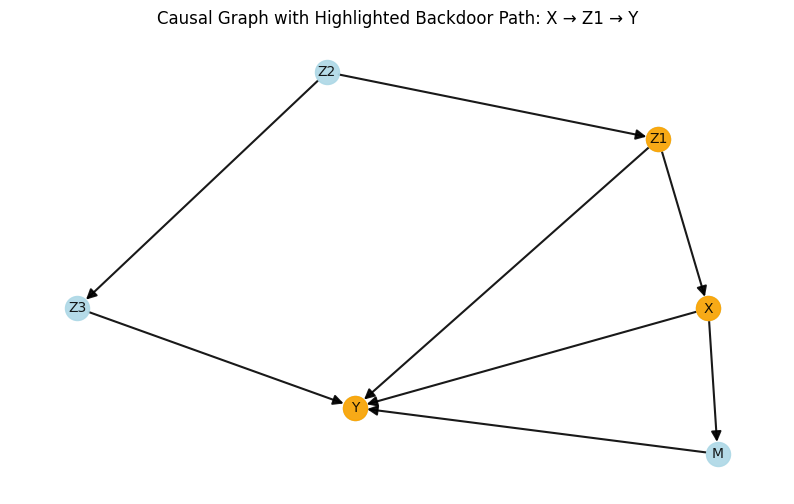

In [13]:
# Find backdoor paths from X to Y
backdoor_paths = causal_graph.get_backdoor_paths('X', 'Y')
print("Backdoor paths from X to Y:")
for i, path in enumerate(backdoor_paths):
    print(f"  Path {i+1}: {path}")

# Highlight the first backdoor path
if backdoor_paths:
    backdoor_path = backdoor_paths[0]
    # Create edge pairs from the path
    backdoor_edges = [(backdoor_path[i], backdoor_path[i+1]) for i in range(len(backdoor_path)-1)]
    
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    viz.plot_causal_graph(
        causal_graph, ax=ax, 
        title=f"Causal Graph with Highlighted Backdoor Path: {' → '.join(backdoor_path)}",
        highlight_nodes=backdoor_path,
        highlight_node_color='orange',
        node_color='lightblue'
    )
    plt.show()

### Visualizing d-separation

Are X and Y d-separated given {'Z1'}? False


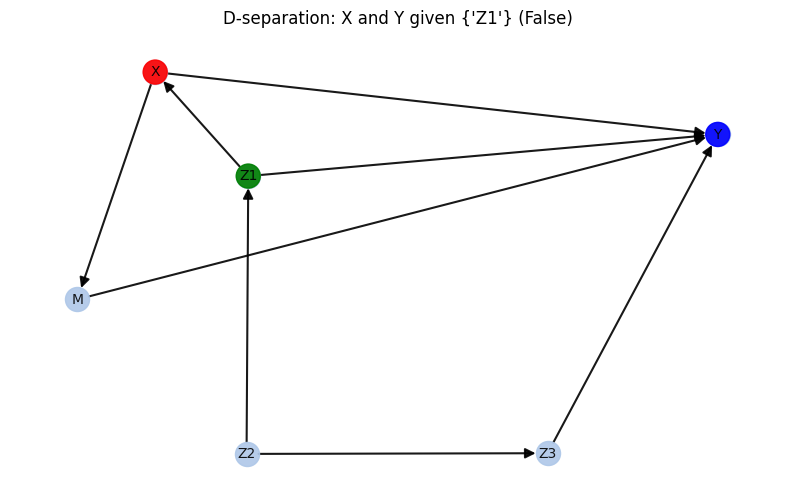

In [15]:
# Visualizing d-separation with conditioning set
conditioning_set = {'Z1'}

# Check if X and Y are d-separated given Z1
is_separated = causal_graph.is_d_separated('X', 'Y', conditioning_set)
print(f"Are X and Y d-separated given {conditioning_set}? {is_separated}")

# Visualize with highlighted conditioning set
plt.figure(figsize=(10, 6))
ax = plt.gca()
viz.plot_causal_graph(
    causal_graph, ax=ax,
    title=f"D-separation: X and Y given {conditioning_set} ({is_separated})",
    highlight_nodes=['X', 'Y'] + list(conditioning_set),
    highlight_node_color=['red', 'blue', 'green'],  # X, Y, Z1
)
plt.show()

### Visualizing interventions

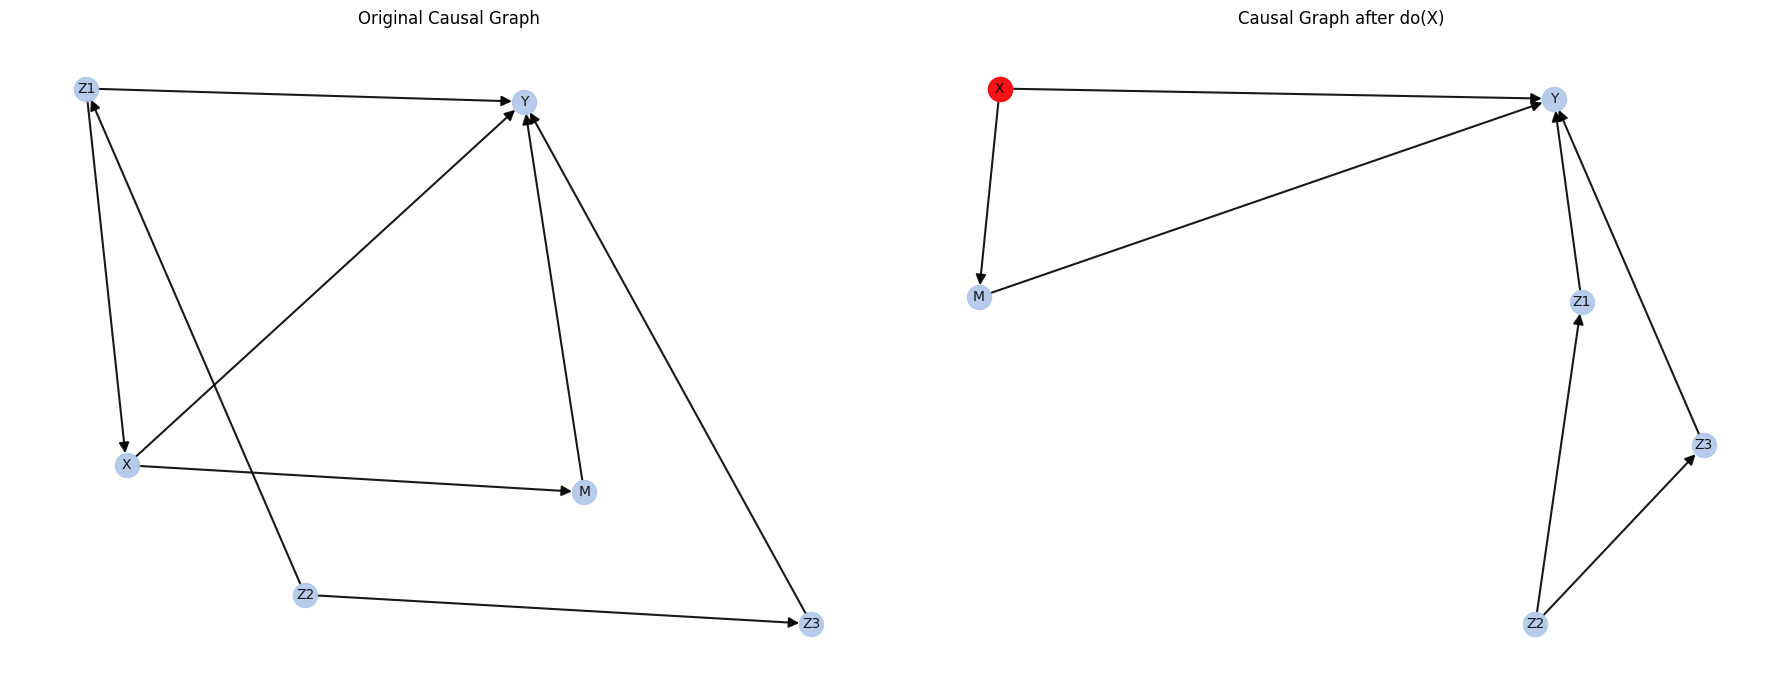

In [17]:
# Create an intervened graph
intervened_graph = causal_graph.do_intervention('X')

# Side-by-side visualization of original and intervened graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Original graph
viz.plot_causal_graph(causal_graph, ax=ax1, title="Original Causal Graph")

# Intervened graph with highlighted intervention
viz.plot_causal_graph(
    intervened_graph, ax=ax2,
    title="Causal Graph after do(X)",
    highlight_nodes=['X'],
    highlight_node_color='red',
)

plt.tight_layout()
plt.show()

### Visualizing different causal structures

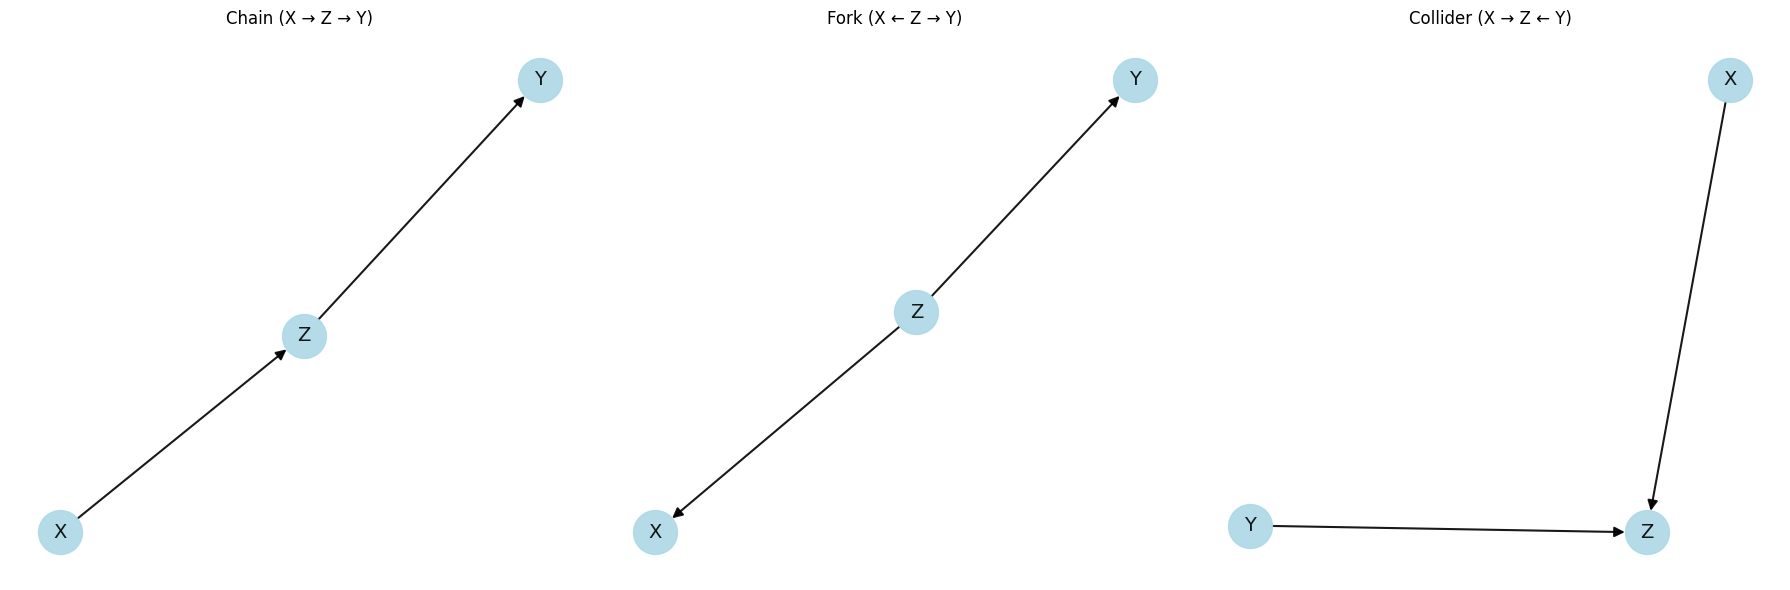

In [18]:
# Create common causal structures for visualization
structures = []

# Chain: X -> Z -> Y
chain = CausalGraph()
for node in ['X', 'Z', 'Y']:
    chain.add_node(node)
chain.add_edge('X', 'Z')
chain.add_edge('Z', 'Y')
structures.append((chain, "Chain (X → Z → Y)"))

# Fork: X <- Z -> Y
fork = CausalGraph()
for node in ['X', 'Z', 'Y']:
    fork.add_node(node)
fork.add_edge('Z', 'X')
fork.add_edge('Z', 'Y')
structures.append((fork, "Fork (X ← Z → Y)"))

# Collider: X -> Z <- Y
collider = CausalGraph()
for node in ['X', 'Z', 'Y']:
    collider.add_node(node)
collider.add_edge('X', 'Z')
collider.add_edge('Y', 'Z')
structures.append((collider, "Collider (X → Z ← Y)"))

# Create a grid of plots for different structures
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (graph, title) in enumerate(structures):
    ax = axes[i]
    viz.plot_causal_graph(graph, ax=ax, title=title,
                         node_size=1000,
                         node_color='lightblue',
                         edge_color='black',
                         font_size=14,
                         with_labels=True)

plt.tight_layout()
plt.show()

## Advanced Visualization Techniques

Let's explore some more advanced visualization features.

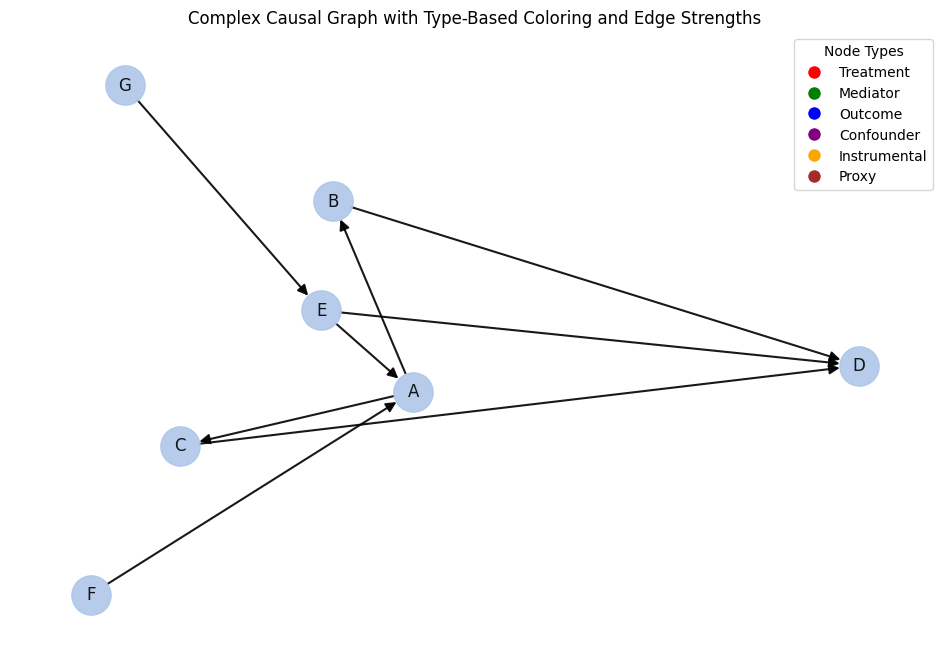

In [20]:
# Create a more complex causal graph for visualization
complex_causal = CausalGraph()

# Add nodes with type attributes
nodes = {
    'A': 'treatment',
    'B': 'mediator',
    'C': 'mediator',
    'D': 'outcome',
    'E': 'confounder',
    'F': 'instrumental',
    'G': 'proxy'
}

for node, node_type in nodes.items():
    complex_causal.add_node(node, type=node_type)

# Add edges with strength attributes
edges = [
    ('F', 'A', 0.8),  # Instrumental -> Treatment
    ('A', 'B', 0.6),  # Treatment -> Mediator
    ('A', 'C', 0.4),  # Treatment -> Mediator
    ('B', 'D', 0.7),  # Mediator -> Outcome
    ('C', 'D', 0.5),  # Mediator -> Outcome
    ('E', 'A', 0.3),  # Confounder -> Treatment
    ('E', 'D', 0.4),  # Confounder -> Outcome
    ('G', 'E', 0.2),  # Proxy -> Confounder
]

for source, target, strength in edges:
    complex_causal.add_edge(source, target, strength=strength)

# Define color mapping for node types
type_colors = {
    'treatment': 'red',
    'mediator': 'green',
    'outcome': 'blue',
    'confounder': 'purple',
    'instrumental': 'orange',
    'proxy': 'brown'
}

# Custom node coloring function
def color_by_type(n, graph):
    node_type = graph.get_node_attributes(n).get('type', 'default')
    return type_colors.get(node_type, 'gray')

# Custom edge width function
def width_by_strength(u, v, graph):
    return graph.get_edge_attributes(u, v).get('strength', 0.5) * 5

# Visualize with custom coloring and edge width functions
plt.figure(figsize=(12, 8))
ax = plt.gca()
viz.plot_causal_graph(
    complex_causal, ax=ax,
    title="Complex Causal Graph with Type-Based Coloring and Edge Strengths",
    with_labels=True,
    font_size=12,
    node_size=800
)

# Add a legend for node types
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=t.capitalize(),
                             markerfacecolor=c, markersize=10) 
                  for t, c in type_colors.items()]
ax.legend(handles=legend_elements, title="Node Types", loc="upper right")

plt.show()

## Summary

In this notebook, we explored the graph visualization capabilities of the causal meta-learning library:

1. Basic graph visualization with `plot_graph` and `plot_causal_graph` functions
2. Customizing node and edge appearance based on attributes
3. Different layout algorithms for node positioning
4. Highlighting paths, nodes, and edges for emphasis
5. Specialized causal graph visualizations for d-separation, backdoor paths, and interventions
6. Advanced customization with color and size mapping functions

These visualization capabilities are essential for understanding and communicating graph structures and causal relationships in the library.